## Timing Comparison for Training Loops

In [1]:
import wandb
import config
import diamond_world_model_trainer as trainer
import incremental_training as incremental_trainer
import os
import shutil
import time
import gc
import torch

run = wandb.init(project='timing-comparison', reinit=True)

Imports successful.
Visualization helpers defined.
Training and validation epoch functions adapted for Batch object and Denoiser.forward.


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irvin-hwang (irvin-hwang-simulacra-systems) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


### Run `_main_training` on non-incremental dataset

--- Main Training Execution --- 
--- Configuration ---
Using device: cuda
Configuration loaded for _main_training.
--- Initializing Models for _main_training ---
Denoiser model created for _main_training. Total parameter count: 330,464,131
DiffusionSampler created for visualization in _main_training.
--- Setting up Optimizer and Scheduler for _main_training ---
Optimizer: AdamW with LR=0.0001
LR Scheduler: LambdaLR with 100 warmup steps.
Wandb watching denoiser model.
No checkpoint found or specified for _main_training. Starting fresh.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset size: 591
Creating new train/val split...
Saved new dataset split to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\dataset_split.pth
Training dataset size: 531, Validation dataset size: 60
Preparing filtered validation subsets for visualization...
Filtering dataset with 60 samples for actions: 

Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 24 samples.
Filtering dataset with 60 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 36 samples.
Found 24 stopped and 36 moving samples.
--- Starting Training Process in _main_training ---


Epoch 1 [Train]:   0%|          | 0/265 [00:00<?, ?it/s]

[Nonincremental Pre training loop] GPU mem alloc: 1263.9 MB, reserved: 1286.0 MB
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   1263 MiB |   1263 MiB |   1263 MiB |   2560 B   |
|       from large pool |   1248 MiB |   1248 MiB |   1248 MiB |      0 B   |
|       from small pool |     15 MiB |     15 MiB |     15 MiB |   2560 B   |
|---------------------------------------------------------------------------|
| Active memory         |   1263 MiB |   1263 MiB |   1263 Mi

Epoch 1 [Valid]:   0%|          | 0/30 [00:16<?, ?it/s]

About to enter validation loop
Sending batch 0 to denoiser
Sending batch 1 to denoiser
Sending batch 2 to denoiser
Sending batch 3 to denoiser
Sending batch 4 to denoiser
Sending batch 5 to denoiser
Sending batch 6 to denoiser
Sending batch 7 to denoiser
Sending batch 8 to denoiser
Sending batch 9 to denoiser
Sending batch 10 to denoiser
Sending batch 11 to denoiser
Sending batch 12 to denoiser
Sending batch 13 to denoiser
Sending batch 14 to denoiser
Sending batch 15 to denoiser
Sending batch 16 to denoiser
Sending batch 17 to denoiser
Sending batch 18 to denoiser
Sending batch 19 to denoiser
Sending batch 20 to denoiser
Sending batch 21 to denoiser
Sending batch 22 to denoiser
Sending batch 23 to denoiser
Sending batch 24 to denoiser
Sending batch 25 to denoiser
Sending batch 26 to denoiser
Sending batch 27 to denoiser
Sending batch 28 to denoiser
Sending batch 29 to denoiser
Validation for epoch 1 took 34.00s
Epoch 1/1 - Train Loss: 0.7482 (MA: 0.7482), Val Loss: 0.7303 (MA: 0.7303)

AttributeError: 'Run' object has no attribute 'history'

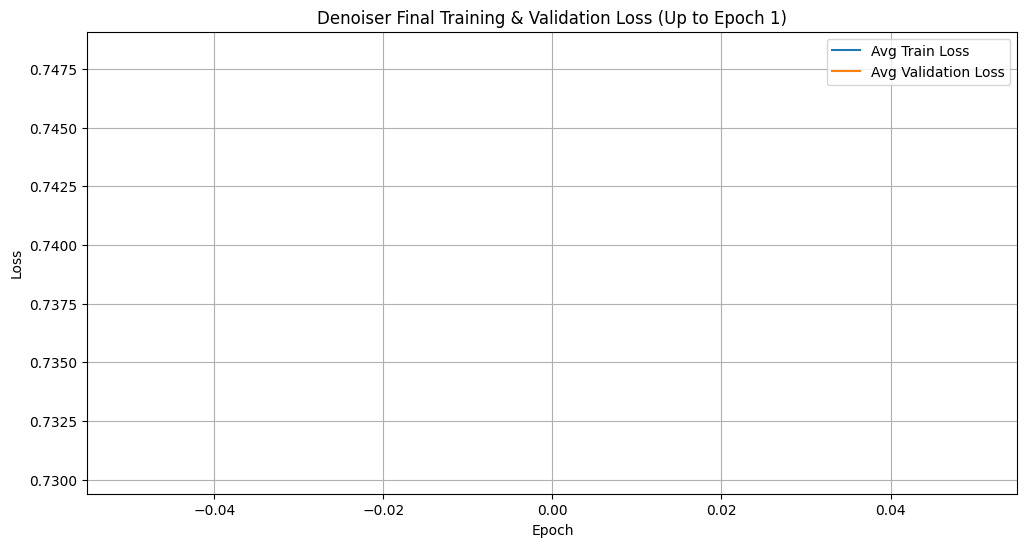

In [2]:
gc.collect()
torch.cuda.empty_cache()

config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_nonincremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_nonincremental_test')
config.IMAGE_DIR = os.path.join(config.DATA_DIR, 'images')
config.CSV_PATH = os.path.join(config.DATA_DIR, 'laundry_data_incremental_test.csv')
config.NUM_EPOCHS = 1

if os.path.exists(config.OUTPUT_DIR):
    shutil.rmtree(config.OUTPUT_DIR)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)

start = time.time()
trainer_run = trainer._main_training(finish_run=False)
noninc_duration = time.time() - start
noninc_hist = trainer_run.history(keys=["nonincremental_fwbw_reserved"]) or {}
noninc_peak_reserved = None
if hasattr(noninc_hist, "__getitem__"):
    try:
        noninc_peak_reserved = noninc_hist["nonincremental_fwbw_reserved"].max()
    except Exception:
        noninc_peak_reserved = None
wandb.finish()

### Run `train_diamond_model` on incremental dataset

In [2]:
gc.collect()
torch.cuda.empty_cache()

config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_incremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_incremental_test')
config.IMAGE_DIR = os.path.join(config.DATA_DIR, 'images')
config.CSV_PATH = os.path.join(config.DATA_DIR, 'laundry_data_incremental_test.csv')
config.EARLY_STOPPING_PATIENCE = 1

if os.path.exists(config.OUTPUT_DIR):
    shutil.rmtree(config.OUTPUT_DIR)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)

wandb.init(project='timing-comparison', reinit=True)
start = time.time()
incremental_trainer.main()
inc_duration = time.time() - start
inc_hist = run_inc.history(keys=["incremental_fwbw_reserved"]) or {}
inc_peak_reserved = None
if hasattr(inc_hist, "__getitem__"):
    try:
        inc_peak_reserved = inc_hist["incremental_fwbw_reserved"].max()
    except Exception:
        inc_peak_reserved = None
wandb.finish()

Found 1 new sessions to collect.


Wrote 4538 entries to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\jetbot_new_data_incremental_test\new.csv
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Fresh dataset size is 299.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset size: 292
Creating new train/val split...
Saved new dataset split to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_incremental_test\dataset_split.pth
[incremental_before_dataloader] GPU mem alloc: 0.0 MB, reserved: 0.0 MB
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Met

Incremental Training Steps:   0%|          | 0/320000 [00:00<?, ?it/s]

Filtering dataset with 30 samples for actions: [0.0]


Filtering Dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Filtered down to 8 samples.
Filtering dataset with 30 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Filtered down to 22 samples.
[Incremental post batch fetch] GPU mem alloc: 5068.4 MB, reserved: 5078.0 MB
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   5068 MiB |   5068 MiB |   5068 MiB |   2560 B   |
|       from large pool |   5007 MiB |   5007 MiB |   5007 MiB |      0 B   |
|       from small pool |     60 MiB |     60 MiB |     60 MiB |   2560 B   |
|---------------------------------------------------------------------------|
| Active memory         |   5068 MiB

KeyboardInterrupt: 

### Compare timings

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    'run': ['non_incremental', 'incremental'],
    'duration_sec': [noninc_duration, inc_duration],
    'peak_reserved_mb': [noninc_peak_reserved, inc_peak_reserved]
})
comparison_df